In [3]:
# Die importierten Funktionen sind Teil meines privaten Python Moduls, das CT Bilder aus einem Datensatz lädt und verarbeitet
from preprocessing import load_folder_paths, get_volume

folder_paths = load_folder_paths()[10]

# Es wird ein 4D Array geladen, davon nur das erste Volumen benutzt
v1 = get_volume(folder_paths, correct_motion=False, spatial_downsampling_factor=2, temporal_downsampling_factor=15, verbose=False)[0]
v1.shape

Dicom files loaded, count: 288


ic| label_count: array([860617, 187951,      4,      2,      1,      1])
ic| window_center: 40, window_width: 80


Info: Downsampling detected (2x), adjusting morphology_shape_2d from (1, 3) to (1, 2)
Info: Downsampling detected (2x), adjusting remove_small_objects_size from 500 to 125
get_3d_mask took 0.10545611381530762 seconds


(16, 256, 256)

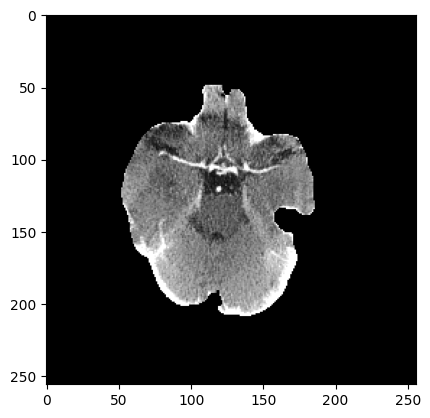

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
# So sieht ein Slice aus
plt.imshow(v1[0], cmap='gray')
plt.show()

## Transformationen
- Spiegelung
- Drehung
- Lineare Transformationen

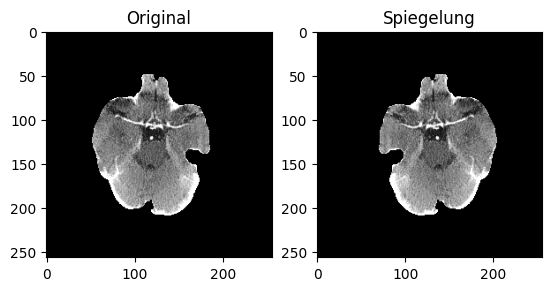

In [5]:
def horizontal_flip(volume):
    # Dieses Verfahren benutzt Numpy Funtionalitäten und
    # die Slice Notation um die Spiegelung zu erreichen
    return volume[:, :, ::-1]

mirrored_v1 = horizontal_flip(v1)

# Original und gespiegeltes Bild werden nebeneinander angezeigt
plt.subplot(1, 2, 1)
plt.imshow(v1[0], cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(mirrored_v1[0], cmap='gray')
plt.title('Spiegelung')
plt.show()


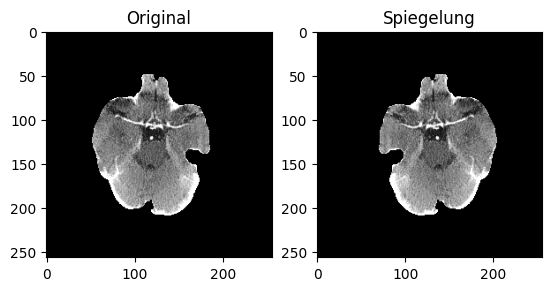

In [6]:

def horizontal_flip_raw(volume):
    # Dieses Verfahren Spiegelt das Bild ohne Numpy spezifische Funktionen
    new_volume = []
    for i in range(len(volume)):
        new_volume.append([])
        for j in range(len(volume[i])):
            # Jede Zeile des Bildes wird mithilfe der Slice Operation umgekehrt
            new_volume[i].append(volume[i][j][::-1])
    return new_volume

mirrored_v1 = horizontal_flip_raw(v1)

# Original und gespiegeltes Bild werden nebeneinander angezeigt
plt.subplot(1, 2, 1)
plt.imshow(v1[0], cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(mirrored_v1[0], cmap='gray')
plt.title('Spiegelung')
plt.show()


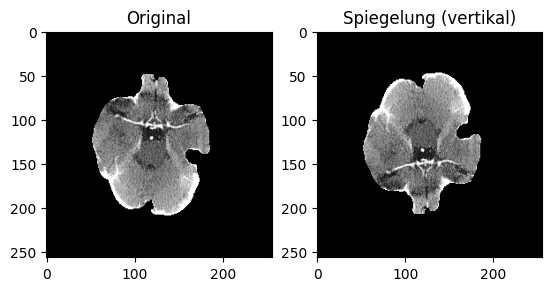

In [7]:
def vertical_flip(volume):
    # Wie bei horizontal_flip, nur dass die Spiegelung vertikal ist, 
    # sodass die Unkehrung per Slice Notation entlang der zweiten Achse erfolgt
    return volume[:, ::-1]

vertical_mirrored_v1 = vertical_flip(v1)

plt.subplot(1, 2, 1)
plt.imshow(v1[0], cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(vertical_mirrored_v1[0], cmap='gray')
plt.title('Spiegelung (vertikal)')
plt.show()

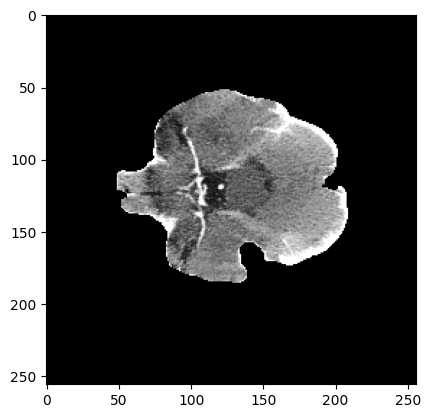

In [8]:
import numpy as np
def rotate_90(volume: np.ndarray):
    return volume.transpose(0, 2, 1)

rotated_v1 = rotate_90(v1)

plt.imshow(rotated_v1[0], cmap='gray')
plt.show()

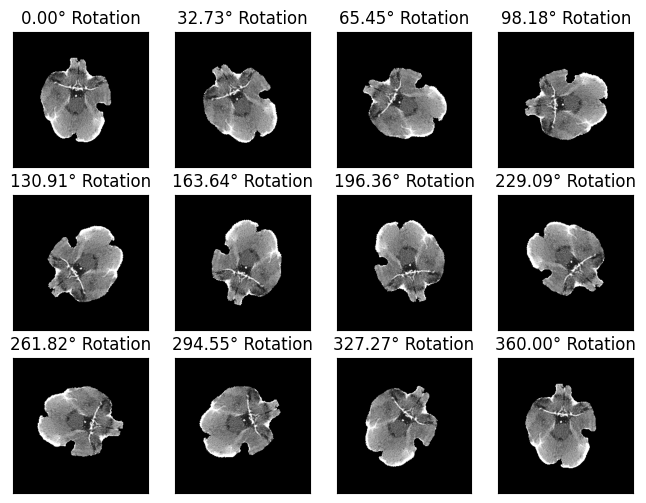

In [9]:
def rotate(angle: int, image: np.ndarray):
    # Rotierung um beliebigen Winkel mit Rotationsmatrix
    new_image = np.zeros_like(image)
    off_y = image.shape[0] // 2
    off_x = image.shape[1] // 2
    # Rotationsmatrix mit Translation (Translation ist der Vektor um den das Bild verschoben wird)
    rot_matrix = np.array([[np.cos(angle), -np.sin(angle), off_x],
                            [np.sin(angle), np.cos(angle), off_y]])
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # rot_matrix = np.array([[-np.sin(angle), np.cos(angle)],
            #                        [np.cos(angle), np.sin(angle)]])
            pos_matrix = np.array([x - off_x, y - off_y, 1])
            new_pos = rot_matrix @ pos_matrix
            # new_pos = new_pos + np.array([200, 200])
            if new_pos[0] >= 0 and new_pos[0] < image.shape[1] and new_pos[1] >= 0 and new_pos[1] < image.shape[0]:
                new_image[y, x] = image[int(new_pos[1]), int(new_pos[0])]
    return new_image

# Visualisierung
num_angles = 12
angles = np.linspace(0, 2 * np.pi, num_angles)
n_rows = int(num_angles ** .5)
n_cols = np.ceil(num_angles / n_rows).astype(int)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(2 * n_cols, 2 * n_rows))
for i, angle in enumerate(angles):
    rotated_image = rotate(angle, v1[0])
    r, c = divmod(i, n_cols)
    axs[r, c].get_xaxis().set_ticks([])
    axs[r, c].get_yaxis().set_ticks([])
    axs[r, c].imshow(rotated_image, cmap='gray')
    axs[r, c].set_title(f'{angle / np.pi * 180:.2f}° Rotation')
plt.show()


Es funktioniert!!!